<a href="https://colab.research.google.com/github/thuhuong205201/Data_preparing/blob/main/Hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
wine = pd.read_csv("/content/drive/MyDrive/datapreparing/winequality-red.csv", sep=",")

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


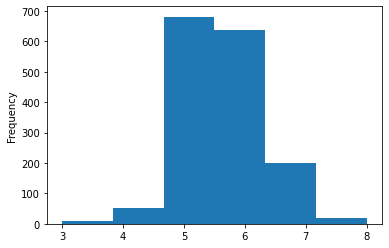

In [6]:
wine['quality'].plot(kind='hist', bins=6)

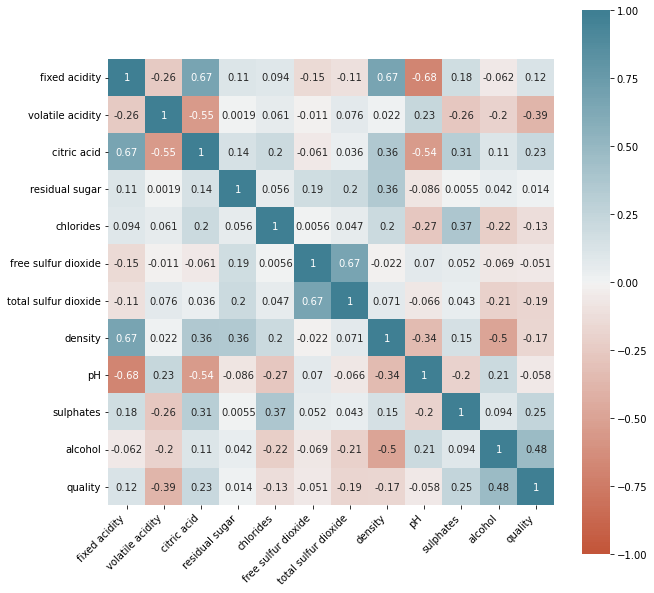

In [7]:
cor = wine.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(
    cor, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax=ax,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

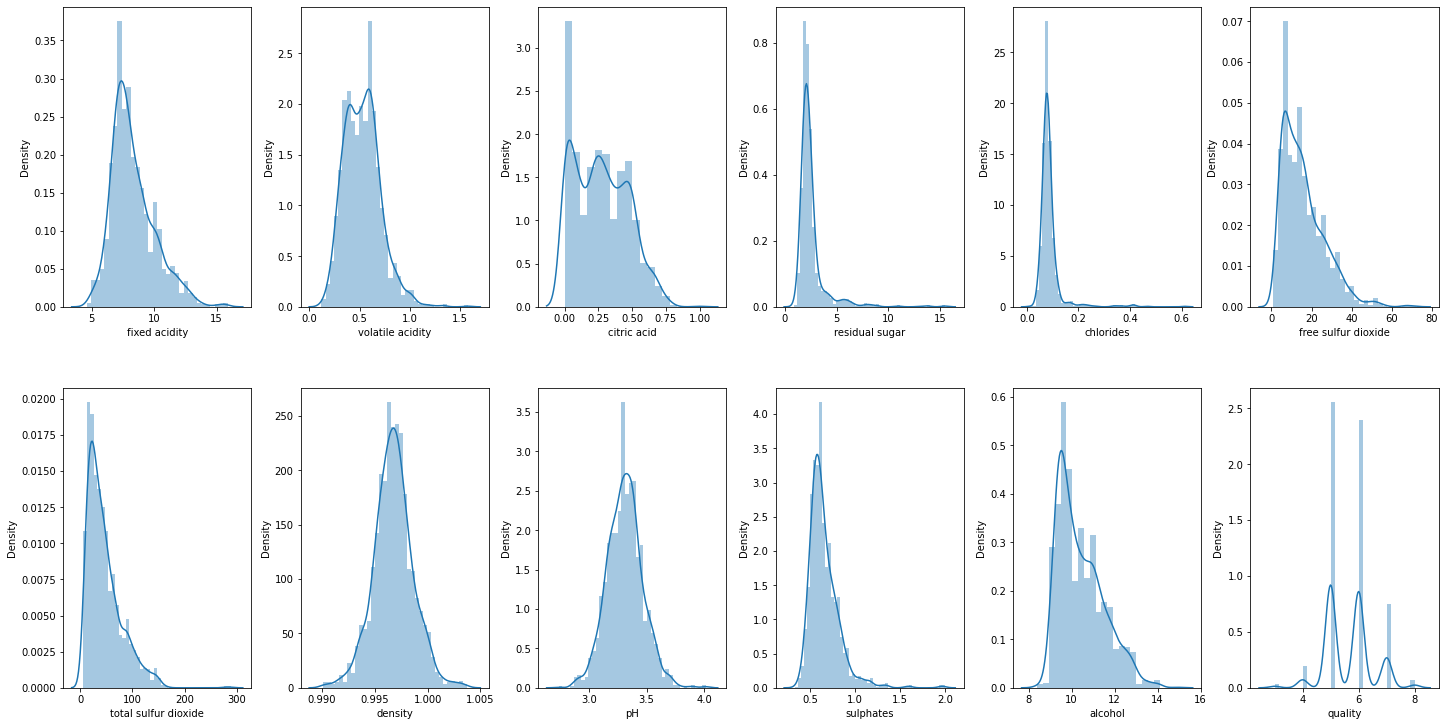

In [8]:
# distribution
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in wine.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [10]:
# from pandas.core.common import random_state
array = wine.values
X = array[:, 0:11]
Y = array[:, 11]
test_size = 0.30
seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state=seed)

In [11]:
X_train.shape, X_test.shape

((1119, 11), (480, 11))

In [12]:
model = LinearRegression().fit(X_train , Y_train)

In [13]:
pred = model.predict(X_test)

In [14]:
wine = pd.DataFrame({'Actual':Y_test,'Predictions':pred})
wine['Predictions']= round(wine['Predictions'],2)
wine.head()

,Actual,Predictions
0,6.0,5.36
1,5.0,5.09
2,6.0,5.63
3,5.0,5.45
4,6.0,5.74


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Actual vs Predictions')

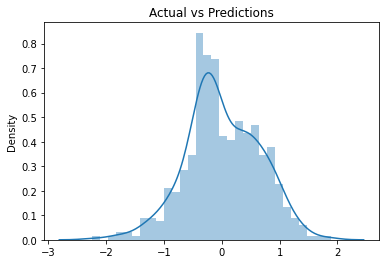

In [15]:
sns.distplot((Y_test-pred),bins=30)
plt.title('Actual vs Predictions')

In [16]:
print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('R-Squared: ',model.score(X_train,Y_train))

MAE: 0.5133956082447173
MSE: 0.4112348717496495
RMSE: 0.6412759715985384
R-Squared:  0.3611982441321644
